In [21]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [22]:
# Generate random matrix A and vector b
# Dimensions
n, d = 100, 40 # you can change the dimension 
# Generate synthetic data matrices
A = np.random.randn(n, d)
# Generate synthetic data vectors
b = np.random.randn(n)

In [84]:
rho = 2 * max(la.eigvals(2 * A.T @ A))
rho

930.9629699682367

In [101]:
def f_1(x):
    return la.norm((A @ x).T @ (A @ x) - b.T @ b)

In [60]:
def f_2( A, b, x):
    sum = 0
    for i in range(n):
        sum += np.abs((A[i]@x)**2 - b[i]**2)
    return sum

In [ ]:
# Value of rho
rho = np.min(la.linalg.eigvals(A))

In [62]:
def subgradient_2(x):
    gradient = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if A[i]@x > b or A[i]@x < -b:
            gradient[i] = 2 * A[i]@x
        else:
            if A[i]@x== -b or A[i]@x == b:
                gradient[i] = 0
            else:
                gradient[i] = - 2 * A[i]@x
    return gradient


In [97]:
def subgradient_1(x):
    Ax2 = la.norm(A @ x)**2
    b2 = la.norm(b)**2
    if Ax2 > b2:
        gradient = 2 * A.T @ A @ x
    else:
        if Ax2 == b2:
            gradient = 0
        else:
            gradient = -2 * 2 * A.T @ A @ x
    return gradient

Set lambda as a array with length k+1.

In [118]:
def m_k(x, x_history, function, subgradient, lamb, k):
    mk_history = []
    fun_val_history = []
    sub_history = []
    mk_gradient_history = []
    nebula_mk_history = []
    for i in range(k + 1):
        fun_val = function(x_history[i])
        fun_val_history.append(fun_val)
        sub = subgradient(x_history[i])
        sub_history.append(sub)
        mk = lamb[i] * fun_val + sub @ (x -  x_history[i]) - rho/2 * la.norm(x-x_history[i])**2
        mk_gradient = lamb[i] * (sub_history[i]) - rho * (x-x_history[i])
        mk_gradient_history.append(mk_gradient)
        Sk = np.sum(lamb[:i+1])
        nebula_mk = np.sum(mk_gradient_history[:i])/Sk
        nebula_mk_history.append(nebula_mk)
        mk_history.append(mk)
        mk_sum = np.sum(mk_history)
    mk = mk_sum / np.sum(lamb[:k+1])

    return mk, x_history, mk_history, sub_history, nebula_mk_history

We will set rho_hat as a variable in the following attempts

In [119]:
def dual_progress(x0, k, function_val, subgradient, lamb, rho, rho_hat):
    x_history = [x0]
    x = x0
    dual_gap_list = []
    for i in range(k):
        grad = subgradient(x=x)
        x = x - 1/((i+1) *(rho_hat -rho)) * grad
        mk = m_k(x = x, x_history= x_history, function = function_val, subgradient = subgradient, lamb = lamb,k = i)
        x_history.append(x)
        fun_val = function_val(x=x)
        prox_gap = fun_val - mk[0]
        dual_gap_list.append(prox_gap)
        
    return mk, fun_val, dual_gap_list
        

In [117]:
lamb = np.ones(1001)

In [95]:
x_random  = np.random.randn(d)

In [122]:
m_k_1, f_val_1, dual_gap = dual_progress(x_random, 10, f_1, subgradient_1, lamb, rho,rho+4) 


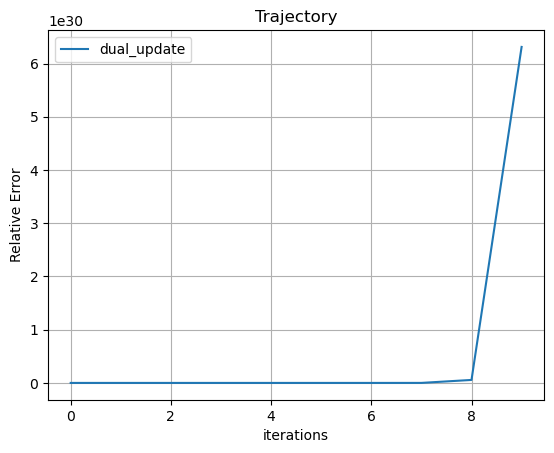

In [124]:
plt.plot(np.arange(len(dual_gap)), dual_gap, label = 'dual_update')
plt.grid(True)
plt.ylabel("Relative Error")
plt.xlabel("iterations")
plt.title('Trajectory')
plt.legend()

In [ ]:
x0_far = np.random.normal(0,1,3) * 900

In [ ]:
_,_, gap = dual_progress(x0_far, 1000000, 6) 
print(_)
plt.plot(np.arange(len(gap)), gap, label = 'dual_update')
plt.grid(True)
plt.ylabel("dual gap")
plt.xlabel("iterations")
plt.title('Trajectory')
plt.legend()

KeyboardInterrupt: 